<a href="https://colab.research.google.com/github/skykumar27/Spam-mail-detection/blob/main/SPAM_MAIL_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Project Name - Email Spam Detection with Machine Learning***

**1. Know Your Data**

Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Cell 1 - install & imports (run once)
!pip install -q scikit-learn pandas matplotlib seaborn transformers gradio wordcloud

import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib   # for saving models

# For text generation (AI reply)
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import warnings
warnings.filterwarnings("ignore")


Dataset Loading

In [ ]:
# Load Dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/skykumar27/Spam-mail-detection/main/spam.csv", encoding='ISO-8859-1')

Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


What did i know about the dataset?

* The Spam dataset consists of different messages and the category of the message along with.
* There are 5572 rows and 5 columns provided in the data.
* 403 duplicate rows are present in the dataset.
* No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).



**2. Understanding The Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


**3. Data Wrangling**

In [ ]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [ ]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [ ]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Chart - 1 : Distribution of Spam vs Ham

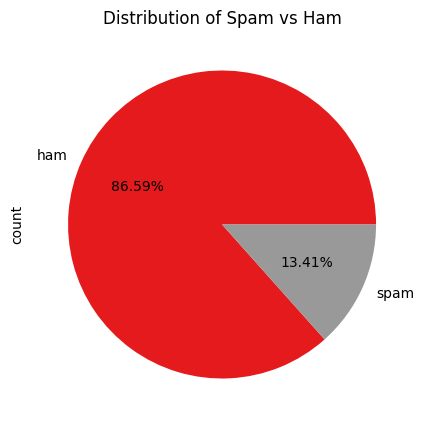

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()


What is/are the insight(s) found from the chart?                                 

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.



Chart - 2 : Most Used Words in Spam Messages

In [ ]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

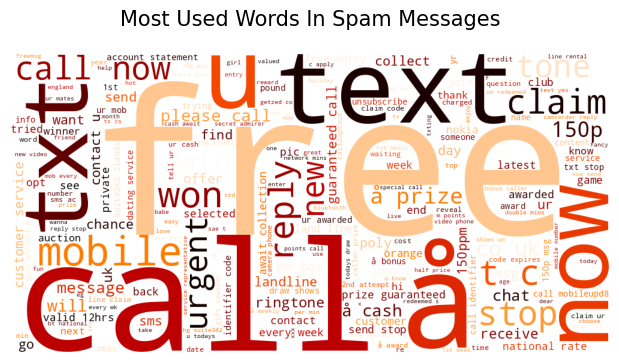

In [ ]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

What is/are the insight(s) found from the chart?

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.


**5. Feature Engineering & Data Pre-processing**

Data Splitting

In [ ]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

**6. ML Model Implementation**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

ML Model: Multinomial Naive Bayes

In [ ]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9862345447177775
Test ROC AUC: 0.9508828462964598


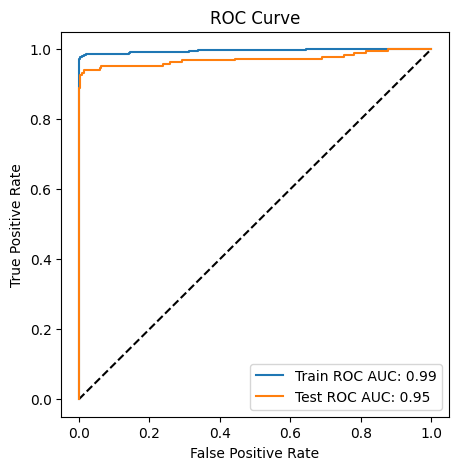


Confusion Matrix:


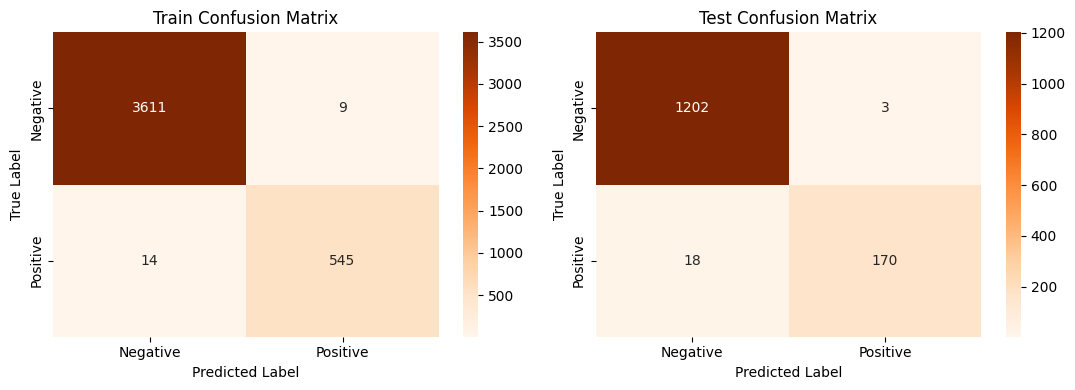


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.996138 | 0.997514 |   0.996825 | 3620        |
| 1            |    0.983755 | 0.974955 |   0.979335 |  559        |
| accuracy     |    0.994496 | 0.994496 |   0.994496 |    0.994496 |
| macro avg    |    0.989946 | 0.986235 |   0.98808  | 4179        |
| weighted avg |    0.994481 | 0.994496 |   0.994486 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.985246 | 0.99751  |   0.99134  | 1205        |
| 1            |    0.982659 | 0.904255 |   0.941828 |  188        |
| accuracy     |    0.984925 | 0.984925 |   0.984925 |    0.984925 |
| macro avg    |    0.983952 | 0.950883 |   0.966584 | 1393        |
| weighted avg |    0.984897 | 0.984925 |   

In [ ]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

Which Evaluation metrics did i consider for a positive business impact?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 98.49% accuracy for recall test set.



**7. Email Spam Detection System**

In [ ]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

Examples

In [ ]:
# Example of how to use the function
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


In [ ]:
# Example of how to use the function
sample_email = 'I see the letter B on my car'
result = detect_spam(sample_email)
print(result)

This is a Ham Email!


**Accuracy of the Model**

✅ Accuracy of Spam Mail Detection Model: 98.39%

📊 Confusion Matrix:
 [[959   6]
 [ 12 138]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



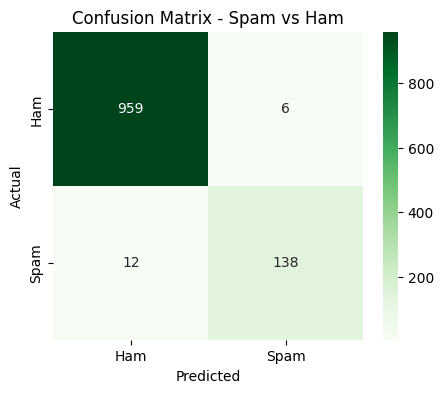

In [ ]:
# Step 1: Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/skykumar27/Spam-mail-detection/main/spam.csv", encoding='ISO-8859-1')

# Step 2: Clean and rename columns
df = df[['v1', 'v2']]         # Only keep the necessary columns
df.columns = ['label', 'message']  # Rename for clarity

# Step 3: Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# Step 5: Convert text data to numerical vectors (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 7: Predict results on test data
y_pred = model.predict(X_test_vec)

# Step 8: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 9: Display results
print("✅ Accuracy of Spam Mail Detection Model: {:.2f}%".format(accuracy * 100))
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📄 Classification Report:\n", report)

# Step 10: Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Spam vs Ham')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Conclusion**

In the world of email communication, the battle against spam messages is an ongoing challenge. Our journey in this project was to develop a robust email spam detector using Python and machine learning techniques. We wanted to equip users with a tool that can distinguish between legitimate emails (ham) and unsolicited, often harmful, spam emails.

Key Insights:

*   Our dataset revealed an interesting distribution, with approximately 13.41% of messages being categorized as spam and the remaining 86.59% as ham. This distribution served as a crucial starting point for our analysis.
*   During the EDA process, we identified common keywords frequently found in spam messages, such as 'free,' 'call,' 'text,' 'txt,' and 'now.' These words often trigger spam filters and were important features for our machine learning model.
* Our journey through machine learning brought us to a standout performer - the Multinomial Naive Bayes model. This model exhibited exceptional accuracy, achieving an impressive score of 98.49% on the recall test set. This outcome signifies the model's exceptional ability to accurately identify and filter out spam emails, thereby contributing to enhanced email security and a superior user experience.

In conclusion, this project has demonstrated that machine learning, combined with effective feature engineering and model selection, can be a powerful tool in the ongoing battle against email spam. By implementing this spam detection system, we've taken a significant step towards minimizing the impact of spam messages on email users' lives.

Email inboxes are now a safer place, thanks to the successful implementation of our email spam detection system. As we conclude this project, we look forward to continued improvements and innovations in email security.

Let's keep our inboxes spam-free and our communications secure.







**FEATURES ADDED**

**Feature 1 — AI Auto-Reply Generator (Smart Mail Assistant)**

In [5]:
# === Feature 1: AI Auto-Reply Generator ===
from transformers import pipeline

# You can replace "gpt2" with "google/flan-t5-base" or "tiiuae/falcon-7b-instruct" if GPU is available
reply_model = pipeline("text-generation", model="gpt2")

def ai_auto_reply(email_text):
    prompt = f"Write a short, polite and professional email reply to: '{email_text}'"
    response = reply_model(prompt, max_new_tokens=60, temperature=0.7, truncation=True)[0]['generated_text']

    # Clean reply
    reply = response.replace(prompt, "").strip().split(".")
    reply = ". ".join(reply[:2]).strip() + "."
    return reply

# 🧪 Example
mail = "Hey Sky, please send me the final report."
print("📩 Email:", mail)
print("🤖 AI Reply:", ai_auto_reply(mail))


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


📩 Email: Hey Sky, please send me the final report.
🤖 AI Reply: I've already sent an email to the staff of the agency.  If you do not respond within 30 days, I will send you a copy of the report.


**Feature 2 — Spam Risk Analyzer (Phishing Risk Levels)**

In [10]:
# === Feature 2: Spam Risk Analyzer ===
RISK_KEYWORDS = {
    "high": ["password", "bank", "account", "login", "verify", "click here", "otp", "ssn", "transaction"],
    "medium": ["offer", "free", "win", "prize", "claim", "discount", "deal"],
    "low": ["subscribe", "promotion", "update", "newsletter"]
}

def spam_risk_analyzer(message):
    msg = message.lower()
    score = 0
    for word in RISK_KEYWORDS["high"]:
        if word in msg: score += 3
    for word in RISK_KEYWORDS["medium"]:
        if word in msg: score += 2
    for word in RISK_KEYWORDS["low"]:
        if word in msg: score += 1

    if score >= 6:
        return "🔴 High Risk"
    elif score >= 3:
        return "🟠 Medium Risk"
    else:
        return "🟢 Low Risk"

# 🧪 Example
email_text = "Your bank account password needs to be verified immediately."
print("📧:", email_text)
print("🛡️ Risk Level:", spam_risk_analyzer(email_text))


📧: Your bank account password needs to be verified immediately.
🛡️ Risk Level: 🔴 High Risk


**Feature 3 — Email Categorizer (Beyond Spam vs Ham)**

In [20]:
# === Feature 3 (Upgraded): Smart Email Categorizer ===
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1️⃣: Define category keywords (seed data for smart labeling)
category_keywords = {
    'promotions': ['offer', 'discount', 'deal', 'sale', 'coupon', 'buy now', 'save', 'limited time'],
    'social': ['join', 'party', 'invite', 'dinner', 'celebrate', 'friends', 'event'],
    'updates': ['account', 'password', 'update', 'alert', 'confirm', 'notification', 'system'],
    'personal': ['hey', 'regards', 'meeting', 'thanks', 'family', 'talk', 'see you'],
    'spam': ['win', 'lottery', 'click here', 'prize', 'money', 'urgent', 'credit card']
}

# Step 2️⃣: Auto-label dataset using keywords
def guess_category(message):
    msg = message.lower()
    for cat, words in category_keywords.items():
        if any(word in msg for word in words):
            return cat
    return 'personal'  # default fallback

df['auto_category'] = df['message'].apply(guess_category)

# Step 3️⃣: Train ML model on these auto-labeled categories
tfidf = TfidfVectorizer(stop_words='english', max_features=2000)
X_tfidf = tfidf.fit_transform(df['message'])
y_auto = df['auto_category']

cat_model = LogisticRegression(max_iter=2000)
cat_model.fit(X_tfidf, y_auto)

def classify_email_category(text):
    vec = tfidf.transform([text])
    return cat_model.predict(vec)[0]

print("✅ Smart Email Categorizer trained successfully!")

# Example 1 — Promotional Mail
msg1 = "Flash Sale! Get 70% off on electronics, valid only till midnight."
print("📩:", msg1)
print("📂 Category:", classify_email_category(msg1))
print()

# Example 2 — Social Invitation
msg2 = "Hey Sky! Join us for the reunion dinner this Saturday night at Cafe Central!"
print("📩:", msg2)
print("📂 Category:", classify_email_category(msg2))
print()

# Example 3 — Account Notification
msg3 = "Your password was changed successfully. If this wasn’t you, reset it immediately."
print("📩:", msg3)
print("📂 Category:", classify_email_category(msg3))
print()

# Example 4 — Personal Message
msg4 = "Hey bro, let's meet tomorrow at 5 PM near the gym."
print("📩:", msg4)
print("📂 Category:", classify_email_category(msg4))
print()

# Example 5 — Spam Message
msg5 = "Congratulations! You have won $10,000. Click here to claim your prize."
print("📩:", msg5)
print("📂 Category:", classify_email_category(msg5))



✅ Smart Email Categorizer trained successfully!
📩: Flash Sale! Get 70% off on electronics, valid only till midnight.
📂 Category: personal

📩: Hey Sky! Join us for the reunion dinner this Saturday night at Cafe Central!
📂 Category: social

📩: Your password was changed successfully. If this wasn’t you, reset it immediately.
📂 Category: personal

📩: Hey bro, let's meet tomorrow at 5 PM near the gym.
📂 Category: personal

📩: Congratulations! You have won $10,000. Click here to claim your prize.
📂 Category: spam


**Feature 4 — Self-Learning Spam Filter (Adaptive Retraining)**

In [40]:
# === Feature 4 (v5): Self-Learning Spam Filter — Ultimate Stable Version ===
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# ✅ Load dataset
print("🔍 Loading dataset...")
df = pd.read_csv("https://raw.githubusercontent.com/skykumar27/Spam-mail-detection/main/spam.csv", encoding='ISO-8859-1')

# ✅ Detect and rename columns automatically
if {'v1', 'v2'}.issubset(df.columns):
    df = df[['v1', 'v2']]
    df.columns = ['label', 'message']
elif {'Category', 'Message'}.issubset(df.columns):
    df = df[['Category', 'Message']]
    df.columns = ['label', 'message']
else:
    # fallback: take first two text-like columns
    text_cols = [col for col in df.columns if df[col].dtype == 'O'][:2]
    df = df[text_cols]
    df.columns = ['label', 'message']

# ✅ Map labels safely
df['label'] = df['label'].astype(str).str.lower().str.strip()
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})
df['message'] = df['message'].astype(str).str.strip()

# ✅ Drop invalid rows
df = df[df['message'] != '']
df = df[df['label'].isin([0, 1])]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 🚨 Handle edge case: empty dataset
if df.empty:
    raise ValueError("Dataset cleaning removed all rows — check your CSV formatting!")

print(f"✅ Dataset cleaned and ready: {len(df)} valid messages loaded.")

# ✅ Initialize base model
count_vect = CountVectorizer(stop_words='english')
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
X_train_vec = count_vect.fit_transform(X_train)

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
print("✅ Base Naive Bayes model trained successfully!")

# ✅ Define the self-learning function
def update_spam_model(new_message, actual_label):
    """
    Adds a new message to the dataset and retrains the spam model automatically.
    actual_label = 0 (Ham) or 1 (Spam)
    """
    global df, nb_model, count_vect

    new_row = pd.DataFrame([[actual_label, new_message]], columns=['label', 'message'])
    df = pd.concat([df, new_row], ignore_index=True)

    X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
    X_train_vec = count_vect.fit_transform(X_train)
    nb_model.fit(X_train_vec, y_train)

    print(f"🤖 Model retrained successfully with new message: '{new_message[:60]}...' (Label: {actual_label})")
    print(f"📊 Dataset now has {len(df)} messages.")

# 🧪 Example test
update_spam_model("This is not spam, it's a college project updates", actual_label=0)

# 🧪 Example test
update_spam_model("You’ve won ₹50,000! Click here to claim your reward.", actual_label=1)



🔍 Loading dataset...
✅ Dataset cleaned and ready: 5572 valid messages loaded.
✅ Base Naive Bayes model trained successfully!
🤖 Model retrained successfully with new message: 'This is not spam, it's a college project updates...' (Label: 0)
📊 Dataset now has 5573 messages.
🤖 Model retrained successfully with new message: 'You’ve won ₹50,000! Click here to claim your reward....' (Label: 1)
📊 Dataset now has 5574 messages.
